<a href="https://colab.research.google.com/github/Team-No-3/Steering_wheel/blob/main/XceptionNet_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inception v1(GoogLeNet)

높은 관련성을 가진 노드들끼리만 연결하여 노드 간의 연결을 줄이면서(Sparse connectivity), 행렬 연산은 Dense 연산을 하도록 처리하는 것에서 나온 결과가 Inception module이다.

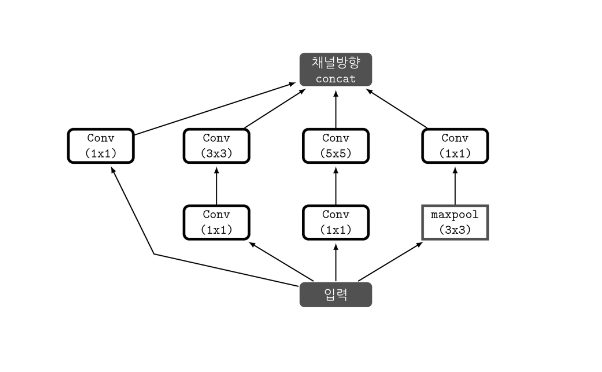

1x1 conv 연산이 Inception module에서의 핵심역할로 기능은 다음과 같다.

1. 채널 수를 조절한다
- 채널간의 Correlation을 연산한다는 의미이다. 1x1 convolution을 사용함으로써, 최적화 과정에서 채널 간의 특징을 추출할 수 있다. 따라서 이후의 3x3 convolution 과정에서는 이미지의 지역정보에만 집중하여 특징을 추출할 수 있다. 즉 역할을 세분화 해준 것이다. 다시 정리해서 채널간의 관계정보는 1x1 conv에 사용되는 파라미터들끼리, 이미지의 지역정보는 3x3 convㅔ 사용되는 파라미터들끼리 연결된다는 점에서 노드간의 연결을 줄였다고 볼 수 있다.

</br>


2.  파라미터 개수를 절약할 수 있다

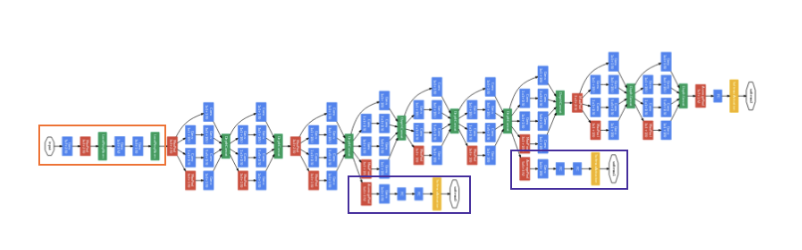

## Inception V2 & V3

이전의 GoogLeNet을 발전시킨 형태로 같은 논문에서 발표되었다. 다음 두가지의 문제를 정의하고 해결책을 제시

문제점
- Factorization: 기존의 convolution 연산에서 사용하는 커널을 개선하면 연산의 복잡도가 줄어들 것
- Representational bottleneck: 뉴럴넷 안에서 차원을 과도하게 줄였을 때 정보의 양이 크게 주는 현상

해결책
1. Factorization
- 기존의 5x5 conv 한번을 3x3 conv 연산 2번으로 변경 (VGGNet에서 더 좋은 성능을 보여줌을 입증)
- 연산의 횟수를 줄이기 위해 3x3 cov를 1x3, 3x1 conv 연산으로 변경
2. Representational bottleneck
- 위의 1번 문제를 해결책으로, Polling과 Conv 연산을 병렬적으로 수행하고 합치는 방법을 사용 (둘 중 하나를 먼저하더라도 단점이 존재하기 때문에 병렬적으로 수행)
- 차원을 줄이면서 발생하는 정보손실을 막기위해 같은 입력값에 대해 다양한 연산을 하도록 했다

* Inception V3에서 추가된 사항
 * stem layer(예열 레이어)의 7x7 conv를 3x3 연산을 3번하는 것으로 대체
 * Optimizer로 "RMSProp"사용
 * batch normalization 적용
 * Label Smoothing 등

## Xception

Xception은 inception module을 이용하여 노드들 간의 연결을 줄였던 inception 모델에서 더 나아가, 채널 간의 관계를 찾는 것과 이미지의 지역                
정보를 찾는 것을 완전히 분리하고자 했다.

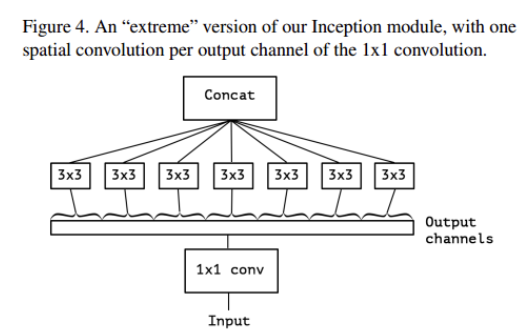

위 module은 채널간의 상관관계를 1X1 cov을 통해 포착하고, 각각의 output channel에 모두 별개로 3x3 conv 연산을 한다. 참고로 Xception은 extreme version of inception module의 줄임말로, Depthwise separable convoution 을 수정하여 만든 모델이다.

## Depthwise separable convolution

각 채널별로 conv연산을 시행하고 그 결과에 1x1 conv 연산을 취하는 것

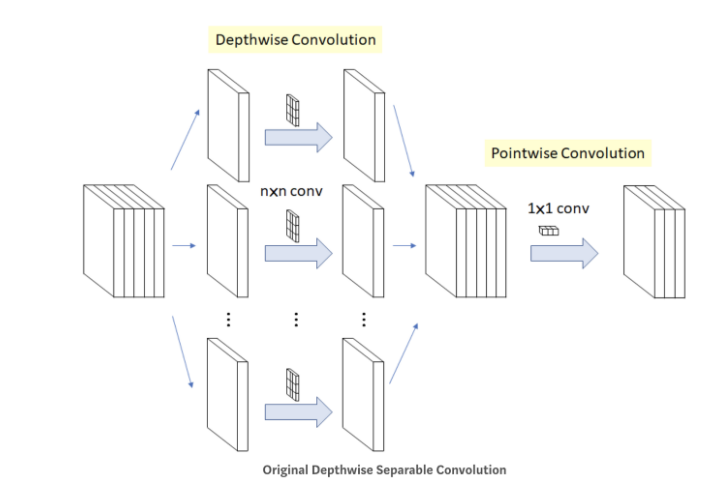

기존의 컨볼루션이 모든 채널과 지역정보를 고려해 하나의 Feature Map을 만들었다면, depthwise convolution은 각 채널 별로 Feature Map을            
하나씩 만들고, 그 다음 1x1 conv 연산을 수행하여 출력되는 피쳐맵 수를 조정한다. 이때 1x1 cov는 Pointwise separable convolution이라고 한다.

1단계: Channel-wise nxnx spatial convolution

K개의 채널에 대해 nxn convolution을 따로 진행해서 합친다.

2단계 Pointwise Convolution

채널의 개수를 줄이기 위한 방법으로 사용

<h2>Xception과 Depthwise separable convolution의 차이점<h2>

연산의 순서

- Xception : pointwise -> depthwise
- Depthwise separable convolution : depthwise -> pointwise

비선형 활성화함수(ReLu)의 유무

- Xception : 첫 연산 후에 ReLu가 있다.
- Depthwise separable convolution : 중간에 ReLu를 적용하지 않는다.